In [106]:
%load_ext autoreload
%autoreload 2

from EBE_PartA_update import (
    #functions
    load_location_and_solar_angles, find_dni, compare_dni, create_utrecht_dni_scatters, create_surfaces_POAs, calculate_optimal_angles, create_bar_charts,
    #global variables
    MODELS, LOCATIONS, KEY_LIST, TILTS, ORIENTATIONS, BUILDINGS, SURFACES_TO_CALCULATE
    ) 
    
import pandas as pd
import numpy as np
import seaborn as sns

# Question 1


DISC     RMSE: 107.85, MBE: -27.497, MAE: 59.402, R2: 0.867
DIRINT   RMSE: 100.257, MBE: -19.347, MAE: 53.655, R2: 0.885
DIRINDEX RMSE: 95.014, MBE: 1.118, MAE: 52.922, R2: 0.896
ERBS     RMSE: 115.529, MBE: -2.474, MAE: 65.891, R2: 0.847


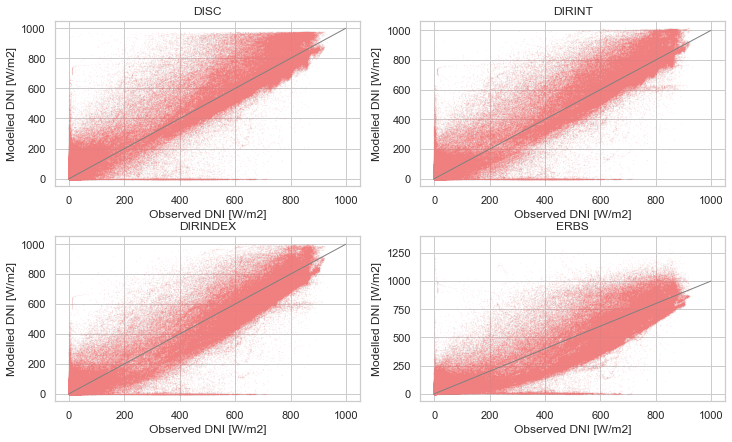

In [107]:
##Calculate the DNI based on four models

#First load the data set and solar angles for Utrecht
Utrecht_data = load_location_and_solar_angles('Utrecht')

###SUB-QUESTION 1.2
for model in MODELS:
    modelled_dni_utrecht = find_dni(model, 'Utrecht')[model]
    compare_dni(model, Utrecht_data.DNI, modelled_dni_utrecht)

###SUB-QUESTION 1.3
scatter_modelled_dnis = create_utrecht_dni_scatters()

# Question 2

### SUB-QUESTION 2.1 & 2.2

In [108]:
Eind_data = find_dni('dirindex','Eindhoven')
Eind_data 

,wind,temp,ghi,apparent_elevation,elevation,azimuth,apparent_zenith,zenith,solar_time,dirindex
datetime,,,,,,,,,,
2019-01-01 10:00:00+01:00,6.0,8.0,41.66670,6.709397,6.709387,143.021563,83.290603,83.290613,9.302074,7.155128
2019-01-01 11:00:00+01:00,5.0,8.3,33.33336,11.335730,11.335724,156.186274,78.664270,78.664276,10.301745,0.000000
2019-01-01 12:00:00+01:00,4.0,8.7,38.88892,13.992526,13.992521,170.065166,76.007474,76.007479,11.301417,0.000000
2019-01-01 13:00:00+01:00,5.0,8.3,63.88894,14.445971,14.445966,184.292621,75.554029,75.554034,12.301090,0.000000
2019-01-01 14:00:00+01:00,5.0,8.0,47.22226,12.653303,12.653297,198.367133,77.346697,77.346703,13.300762,0.000000
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 11:00:00+01:00,2.0,6.0,186.11126,11.280123,11.280118,156.346360,78.719877,78.719882,10.311633,454.161806
2019-12-31 12:00:00+01:00,2.0,5.7,105.55564,13.912775,13.912772,170.216025,76.087225,76.087228,11.311301,40.156026
2019-12-31 13:00:00+01:00,2.0,5.3,58.33338,14.342988,14.342985,184.428223,75.657012,75.657015,12.310969,0.000000


In [109]:
BUILDINGS_df = pd.DataFrame(BUILDINGS)
BUILDINGS_df 

,SurfaceASE,SurfaceASW,SurfaceBE,SurfaceBS,SurfaceBW,RoofCS,RoofCN,RoofDW,RoofDE
tilt,90,90,90,90,90,40,40,40,40
orientation,135,225,90,180,270,180,0,270,90


#### Note NaNs in BUILDINGS dataframe are to be calculated in next subquestion

### SUB-QUESTION 2.3

In [110]:
all_surface_POA_data = create_surfaces_POAs('dirindex', "Eindhoven", BUILDINGS_df)
all_surface_POA_data
POA_direct = all_surface_POA_data.loc[:,[x for x in all_surface_POA_data.columns if "direct" in x]]
POA_direct
POA_diffuse = all_surface_POA_data.loc[:,[x for x in all_surface_POA_data.columns if "diffuse" in x]]
POA_diffuse
POA_total = all_surface_POA_data.loc[:,[x for x in all_surface_POA_data.columns if "global" in x]]
POA_total

,SurfaceASE_global,SurfaceASW_global,SurfaceBE_global,SurfaceBS_global,SurfaceBW_global,RoofCS_global,RoofCN_global,RoofDW_global,RoofDE_global
datetime,,,,,,,,,
2019-01-01 10:00:00+01:00,36.629542,30.584575,33.867383,35.269759,29.592945,48.572187,44.282821,44.282821,47.670757
2019-01-01 11:00:00+01:00,20.833350,20.833350,20.833350,20.833350,20.833350,30.408913,30.408913,30.408913,30.408913
2019-01-01 12:00:00+01:00,24.305575,24.305575,24.305575,24.305575,24.305575,35.477065,35.477065,35.477065,35.477065
2019-01-01 13:00:00+01:00,39.930588,39.930588,39.930588,39.930588,39.930588,58.283750,58.283750,58.283750,58.283750
2019-01-01 14:00:00+01:00,29.513912,29.513912,29.513912,29.513912,29.513912,43.079294,43.079294,43.079294,43.079294
...,...,...,...,...,...,...,...,...,...
2019-12-31 11:00:00+01:00,410.390796,157.680863,174.250116,403.527587,-4.442792,286.802631,-43.488542,-43.488542,139.425913
2019-12-31 12:00:00+01:00,87.888343,78.521049,62.667660,94.455032,56.043983,110.847616,78.761086,81.899852,90.415087
2019-12-31 13:00:00+01:00,36.458362,36.458362,36.458362,36.458362,36.458362,53.215598,53.215598,53.215598,53.215598


### SUB-QUESTION 2.4 - calculate the optimal angles for RoofA and Roof B

# query - eindhoven data and dirindex model is correct?


In [111]:
POA_sums_RoofA_and_B = calculate_optimal_angles('dirindex', 'Eindhoven', SURFACES_TO_CALCULATE)
POA_sums_RoofA_and_B

,surface,tilt,orientation,sum of POA global
0,RoofA,10,135,1.547482
1,RoofA,10,225,1.459098
2,RoofA,15,135,1.573889
3,RoofA,15,225,1.443461
4,RoofA,20,135,1.593407
5,RoofA,20,225,1.423280
6,RoofA,25,135,1.605888
7,RoofA,25,225,1.398826
8,RoofA,30,135,1.611237
9,RoofA,30,225,1.371234


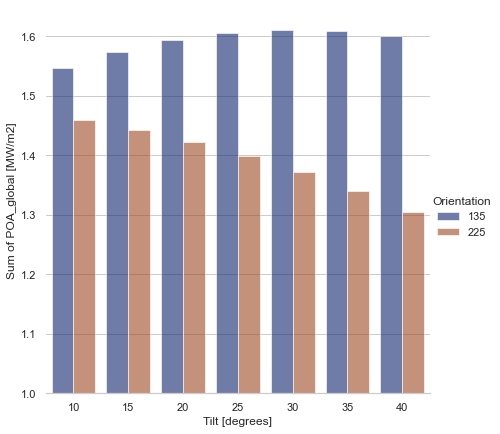

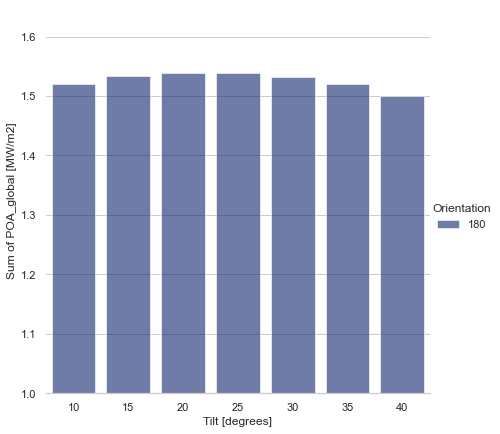

In [112]:
create_bar_charts('RoofA')
create_bar_charts('RoofB')

### SUB-QUESTION 2.4


In [74]:
BUILDINGS

{'SurfaceASE': {'tilt': 90, 'orientation': 135},
 'SurfaceASW': {'tilt': 90, 'orientation': 225},
 'SurfaceBE': {'tilt': 90, 'orientation': 90},
 'SurfaceBS': {'tilt': 90, 'orientation': 180},
 'SurfaceBW': {'tilt': 90, 'orientation': 270},
 'RoofCS': {'tilt': 40, 'orientation': 180},
 'RoofCN': {'tilt': 40, 'orientation': 0},
 'RoofDW': {'tilt': 40, 'orientation': 270},
 'RoofDE': {'tilt': 40, 'orientation': 90}}

In [9]:
POA_sums_RoofA_and_B

,surface,tilt,orientation,sum of POA global
0,RoofA,10,135,1.547482
1,RoofA,10,225,1.459098
2,RoofA,15,135,1.573889
3,RoofA,15,225,1.443461
4,RoofA,20,135,1.593407
5,RoofA,20,225,1.423280
6,RoofA,25,135,1.605888
7,RoofA,25,225,1.398826
8,RoofA,30,135,1.611237
9,RoofA,30,225,1.371234


# Sub-Question 2.5

## query - works for A but not B?


In [15]:
POA_sums_RoofA = POA_sums_RoofA_and_B.loc[lambda df: df['surface'] == "RoofA" ]
POA_sums_RoofA
max_a_row = POA_sums_RoofA.iloc[POA_sums_RoofA['sum of POA global'].idxmax(axis=0)]
max_a_row['tilt']
max_a_row['orientation']

# Attempting same concept for B does not work, dont know why
POA_sums_RoofB = POA_sums_RoofA_and_B.loc[lambda df: df['surface'] == "RoofB"]
# POA_sums_RoofB.keys()
#POA_sums_RoofB['sum of POA global'].max()
# max_b_row = POA_sums_RoofB.iloc[POA_sums_RoofB['sum of POA global'].idxmax(axis=0)]

In [76]:
BUILDINGS_df

,SurfaceASE,SurfaceASW,SurfaceBE,SurfaceBS,SurfaceBW,RoofCS,RoofCN,RoofDW,RoofDE
tilt,90,90,90,90,90,40,40,40,40
orientation,135,225,90,180,270,180,0,270,90


In [16]:
POA_sums_RoofA = POA_sums_RoofA_and_B.loc[lambda df: df['surface'] == "RoofA" ]
POA_sums_RoofA
max_a_row = POA_sums_RoofA.iloc[POA_sums_RoofA['sum of POA global'].idxmax(axis=0)]

POA_sums_RoofB['sum of POA global'].max()

AB = [[max_a_row['tilt'], 20], [max_a_row['orientation'],180]]

ABdf = pd.DataFrame(data = AB, index = ['tilt', 'orientation'], columns = ["RoofA", "RoofB"])
ABdf

,RoofA,RoofB
tilt,30,20
orientation,135,180


In [90]:
BUILDINGS_df = pd.DataFrame(BUILDINGS)

BUILDINGS_df_update =  BUILDINGS_df.merge(ABdf, left_index=True, right_index=True, how = 'left')
BUILDINGS_df_update




,SurfaceASE,SurfaceASW,SurfaceBE,SurfaceBS,SurfaceBW,RoofCS,RoofCN,RoofDW,RoofDE,RoofA,RoofB
tilt,90,90,90,90,90,40,40,40,40,30,20
orientation,135,225,90,180,270,180,0,270,90,135,180


### 2.5 cont - creating new POA tables now buildings dict is filled with RoofA and RoofB


In [18]:
all_surface_POA_data = create_surfaces_POAs('dirindex', "Eindhoven", BUILDINGS_df_update)
all_surface_POA_data

,SurfaceASE_global,SurfaceASE_direct,SurfaceASE_diffuse,SurfaceASE_sky_diffuse,SurfaceASE_ground_diffuse,SurfaceASW_global,SurfaceASW_direct,SurfaceASW_diffuse,SurfaceASW_sky_diffuse,SurfaceASW_ground_diffuse,...,RoofA_global,RoofA_direct,RoofA_diffuse,RoofA_sky_diffuse,RoofA_ground_diffuse,RoofB_global,RoofB_direct,RoofB_diffuse,RoofB_sky_diffuse,RoofB_ground_diffuse
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01 10:00:00+01:00,36.629542,7.036597,29.592945,24.384608,5.208337,30.584575,0.991630,29.592945,24.384608,5.208337,...,50.442342,4.242259,46.200083,45.502298,0.697785,50.339874,2.727128,47.612745,47.298644,0.314101
2019-01-01 11:00:00+01:00,20.833350,0.000000,20.833350,16.666680,4.166670,20.833350,0.000000,20.833350,16.666680,4.166670,...,31.658676,0.000000,31.658676,31.100448,0.558228,32.579517,0.000000,32.579517,32.328236,0.251281
2019-01-01 12:00:00+01:00,24.305575,0.000000,24.305575,19.444460,4.861115,24.305575,0.000000,24.305575,19.444460,4.861115,...,36.935122,0.000000,36.935122,36.283856,0.651266,38.009437,0.000000,38.009437,37.716276,0.293161
2019-01-01 13:00:00+01:00,39.930588,0.000000,39.930588,31.944470,7.986117,39.930588,0.000000,39.930588,31.944470,7.986117,...,60.679129,0.000000,60.679129,59.609193,1.069937,62.444075,0.000000,62.444075,61.962453,0.481622
2019-01-01 14:00:00+01:00,29.513912,0.000000,29.513912,23.611130,5.902782,29.513912,0.000000,29.513912,23.611130,5.902782,...,44.849791,0.000000,44.849791,44.058968,0.790823,46.154316,0.000000,46.154316,45.798335,0.355981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 11:00:00+01:00,410.390796,414.833588,-4.442792,-27.706699,23.263907,157.680863,162.123655,-4.442792,-27.706699,23.263907,...,235.767010,284.351642,-48.584632,-51.701405,3.116773,170.673794,223.013288,-52.339495,-53.742480,1.402985
2019-12-31 12:00:00+01:00,87.888343,31.844360,56.043983,42.849528,13.194455,78.521049,22.477066,56.043983,42.849528,13.194455,...,106.009938,24.283909,81.726029,79.958307,1.767722,106.120995,22.210359,83.910636,83.114913,0.795723
2019-12-31 13:00:00+01:00,36.458362,0.000000,36.458362,29.166690,7.291672,36.458362,0.000000,36.458362,29.166690,7.291672,...,55.402683,0.000000,55.402683,54.425784,0.976899,57.014155,0.000000,57.014155,56.574413,0.439742


In [19]:
POA_direct = all_surface_POA_data.loc[:,[x for x in all_surface_POA_data.columns if "direct" in x]]
POA_direct
POA_diffuse = all_surface_POA_data.loc[:,[x for x in all_surface_POA_data.columns if "diffuse" in x]]
POA_diffuse
POA_total = all_surface_POA_data.loc[:,[x for x in all_surface_POA_data.columns if "global" in x]]
POA_total

,SurfaceASE_global,SurfaceASW_global,SurfaceBE_global,SurfaceBS_global,SurfaceBW_global,RoofCS_global,RoofCN_global,RoofDW_global,RoofDE_global,RoofA_global,RoofB_global
datetime,,,,,,,,,,,
2019-01-01 10:00:00+01:00,36.629542,30.584575,33.867383,35.269759,29.592945,48.572187,44.282821,44.282821,47.670757,50.442342,50.339874
2019-01-01 11:00:00+01:00,20.833350,20.833350,20.833350,20.833350,20.833350,30.408913,30.408913,30.408913,30.408913,31.658676,32.579517
2019-01-01 12:00:00+01:00,24.305575,24.305575,24.305575,24.305575,24.305575,35.477065,35.477065,35.477065,35.477065,36.935122,38.009437
2019-01-01 13:00:00+01:00,39.930588,39.930588,39.930588,39.930588,39.930588,58.283750,58.283750,58.283750,58.283750,60.679129,62.444075
2019-01-01 14:00:00+01:00,29.513912,29.513912,29.513912,29.513912,29.513912,43.079294,43.079294,43.079294,43.079294,44.849791,46.154316
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 11:00:00+01:00,410.390796,157.680863,174.250116,403.527587,-4.442792,286.802631,-43.488542,-43.488542,139.425913,235.767010,170.673794
2019-12-31 12:00:00+01:00,87.888343,78.521049,62.667660,94.455032,56.043983,110.847616,78.761086,81.899852,90.415087,106.009938,106.120995
2019-12-31 13:00:00+01:00,36.458362,36.458362,36.458362,36.458362,36.458362,53.215598,53.215598,53.215598,53.215598,55.402683,57.014155


## Sub-Question 2.6
*Compare the annual POA_total irradiance sums (in kWh/m2
) for all the building surfaces in a 
bar-chart. Which building surface has the highest annual irradiance? Shortly discuss your 
results, about the impact of the tilt and orientation.*

best is 135 orientation, 30 tilt for A, and 20 tilt for B

seems  plausible since when you compare RoofB with SurfaceCS and SurfaceBS (all same orientation):
RoofB - tilt 20 - POA at 12.00 = 38
RoofCS - tilt 40 - POA at 12.00 = 35
Surface BS - tilt 90 - POA at 12.00 = 24

In [66]:
BUILDINGS_df_update

,SurfaceASE,SurfaceASW,SurfaceBE,SurfaceBS,SurfaceBW,RoofCS,RoofCN,RoofDW,RoofDE,RoofA,RoofB
tilt,90,90,90,90,90,40,40,40,40,30,20
orientation,135,225,90,180,270,180,0,270,90,135,180


# Question 3

### SUB-QUESTION 3.1

In [65]:
HouseRoofHeight = 3/np.sin(np.deg2rad(40))
# For the office rooftops, assume that the area of the systems will be equal to the 50% of the area of the rooftop. 
#Assume these to be mounted on top of the existing roof with the proper tilt.
    
Building_sizes_dict = {"SurfaceASE": {"H":100, "W":60, "percentage_covered":0.3},"SurfaceASW" : {"H":100, "W":50, "percentage_covered":0.3},"SurfaceBE" : {"H":30, "W":30, "percentage_covered":0.3},"SurfaceBS": {"H":30, "W":50, "percentage_covered":0.3},"SurfaceBW": {"H":30, "W":30, "percentage_covered":0.3},"RoofCS": {"H":HouseRoofHeight, "W":50, "percentage_covered":0.6},"RoofCN": {"H":HouseRoofHeight, "W":50, "percentage_covered":0.6},"RoofDW": {"H":HouseRoofHeight, "W":50, "percentage_covered":0.6},"RoofDE": {"H":HouseRoofHeight, "W":50, "percentage_covered":0.6},"RoofA": {"H":60, "W":50, "percentage_covered":0.5},"RoofB":{"H":30, "W":50, "percentage_covered":0.5}}
Building_sizes = pd.DataFrame(data = Building_sizes_dict).transpose()

Building_sizes["Area"] = round(Building_sizes['H']*Building_sizes['W']*Building_sizes['percentage_covered'])

Building_sizes = Building_sizes.transpose()
Building_sizes

BUILDINGS_tilts_areas = BUILDINGS_df_update.copy()
BUILDINGS_tilts_areas = pd.concat([BUILDINGS_tilts_areas, Building_sizes])
BUILDINGS_tilts_areas = BUILDINGS_tilts_areas.drop(['H', 'W', 'percentage_covered'])
BUILDINGS_tilts_areas

,SurfaceASE,SurfaceASW,SurfaceBE,SurfaceBS,SurfaceBW,RoofCS,RoofCN,RoofDW,RoofDE,RoofA,RoofB
tilt,90.0,90.0,90.0,90.0,90.0,40.0,40.0,40.0,40.0,30.0,20.0
orientation,135.0,225.0,90.0,180.0,270.0,180.0,0.0,270.0,90.0,135.0,180.0
Area,1800.0,1500.0,270.0,450.0,270.0,140.0,140.0,140.0,140.0,1500.0,750.0


#### query - why the tilt and orientations are also rounded to match the area values?


### SUB-QUESTION 3.2 - model the performance


In [22]:
def load_ModuleParameters():
    df = pd.read_excel("ModuleParameters.xlsx", index_col = 'Parameters')
    return df

ModuleParameters = load_ModuleParameters()
ModuleParameters

,HIT,CdTe,mono-Si
Parameters,,,
Vintage,2013,2009,2013
Area,1.26,0.72,1.93
Material,a-Si / mono-Si,CdTe,c-Si
Cells_in_Series,72,116,72
Parallel_Strings,1,1,1
Isco,5.8738,1.18,8.5753
Voco,52.0042,94.57,44.2921
Impo,5.5383,1.01,7.963
Vmpo,43.1204,70.56,35.0837


# Subquestion 3.2

surfaces -11
modules  - 3



In [35]:
BUILDINGS_tilts_areas

,SurfaceASE,SurfaceASW,SurfaceBE,SurfaceBS,SurfaceBW,RoofCS,RoofCN,RoofDW,RoofDE,RoofA,RoofB
tilt,90.0,90.0,90.0,90.0,90.0,40.0,40.0,40.0,40.0,30.0,20.0
orientation,135.0,225.0,90.0,180.0,270.0,180.0,0.0,270.0,90.0,135.0,180.0
Area,1800.0,1500.0,270.0,450.0,270.0,140.0,140.0,140.0,140.0,1500.0,750.0


In [38]:
Utrecht_data #recall this was called using load_location_and_solar_angles function

,ghi,DNI,DHI,temp,apparent_elevation,elevation,azimuth,apparent_zenith,zenith,solar_time
timestamp,,,,,,,,,,
2015-01-01 08:35:44,45.6471,124.75400,36.2445,2.0,4.537887,4.537884,137.746624,85.462113,85.462116,8.883908
2015-01-01 08:36:14,44.6840,125.43000,35.3006,1.9,4.589490,4.589487,137.849738,85.410510,85.410513,8.892239
2015-01-01 08:36:44,44.4430,125.91200,34.7341,1.9,4.640990,4.640987,137.952911,85.359010,85.359013,8.900569
2015-01-01 08:37:14,45.1171,129.72700,34.9700,2.0,4.692388,4.692385,138.056143,85.307612,85.307615,8.908900
2015-01-01 08:37:44,44.9726,126.73300,34.9700,2.0,4.743683,4.743680,138.159434,85.256317,85.256320,8.917230
...,...,...,...,...,...,...,...,...,...,...
2015-12-31 14:46:36,26.2664,9.69902,23.8581,9.8,4.736382,4.736366,221.683740,85.263618,85.263634,15.072863
2015-12-31 14:47:06,25.3043,8.49268,23.1508,9.8,4.685292,4.685276,221.787059,85.314708,85.314724,15.081194
2015-12-31 14:47:36,24.7270,8.01014,22.7265,9.8,4.634099,4.634082,221.890319,85.365901,85.365918,15.089525


In [103]:
from pvlib.irradiance import get_total_irradiance,disc,dirint,dirindex,erbs,aoi
from pvlib.solarposition import ephemeris
from pvlib.atmosphere import get_relative_airmass,get_absolute_airmass
from pvlib.clearsky import lookup_linke_turbidity,ineichen
from pvlib.pvsystem import sapm_effective_irradiance, sapm
from pvlib.temperature import sapm_cell

def get_aoi_and_POAs(BUILDINGS_tilts_areas:dict, location_data):
    
    #note most of same variables so one function, using brackets notation for things that will eventually need to be in a for loop
    
    surface_tilt = BUILDINGS_tilts_areas['SurfaceASE']['tilt']
    surface_azimuth = BUILDINGS_tilts_areas['SurfaceASE']['orientation']
    solar_zenith =  location_data.zenith
    solar_azimuth = location_data.azimuth
    
    df_aoi = aoi(surface_tilt, surface_azimuth, solar_zenith, solar_azimuth)
    
    dni = location_data.DNI #note for Eindhoven it would need to be .dirindex (could use previous function?)
    ghi = location_data.ghi
    dhi = location_data.DHI #and again for Eind -> .assign(dhi_from_dni = lambda df: df.ghi  - np.cos(np.rad2deg(df.zenith))*df[model] )
    
    df_POAs = get_total_irradiance(surface_tilt, surface_azimuth, solar_zenith, solar_azimuth, dni, ghi, dhi)
    df_aoi_POA = df_aoi.to_frame().merge(df_POAs, left_index=True, right_index=True, how= 'left')   
    return df_aoi_POA
    
def get_DC_output(location:str, BUILDINGS_tilts_areas:dict):
    
    location_data = load_location_and_solar_angles(location)
    df_aoi_POA = get_aoi_and_POAs(BUILDINGS_tilts_areas, location_data)
    location_data = location_data.merge(df_aoi_POA, left_index=True, right_index=True, how= 'left')
    return location_data

get_DC_output('Eindhoven', BUILDINGS_tilts_areas)

#get_aoi_and_POAs(BUILDINGS_tilts_areas, Utrecht_data)

AttributeError: 'DataFrame' object has no attribute 'DNI'

In [86]:
Utrecht_data

,ghi,DNI,DHI,temp,apparent_elevation,elevation,azimuth,apparent_zenith,zenith,solar_time
timestamp,,,,,,,,,,
2015-01-01 08:35:44,45.6471,124.75400,36.2445,2.0,4.537887,4.537884,137.746624,85.462113,85.462116,8.883908
2015-01-01 08:36:14,44.6840,125.43000,35.3006,1.9,4.589490,4.589487,137.849738,85.410510,85.410513,8.892239
2015-01-01 08:36:44,44.4430,125.91200,34.7341,1.9,4.640990,4.640987,137.952911,85.359010,85.359013,8.900569
2015-01-01 08:37:14,45.1171,129.72700,34.9700,2.0,4.692388,4.692385,138.056143,85.307612,85.307615,8.908900
2015-01-01 08:37:44,44.9726,126.73300,34.9700,2.0,4.743683,4.743680,138.159434,85.256317,85.256320,8.917230
...,...,...,...,...,...,...,...,...,...,...
2015-12-31 14:46:36,26.2664,9.69902,23.8581,9.8,4.736382,4.736366,221.683740,85.263618,85.263634,15.072863
2015-12-31 14:47:06,25.3043,8.49268,23.1508,9.8,4.685292,4.685276,221.787059,85.314708,85.314724,15.081194
2015-12-31 14:47:36,24.7270,8.01014,22.7265,9.8,4.634099,4.634082,221.890319,85.365901,85.365918,15.089525


Utrecht_data is time-stamped, so can make one for each surface and to this can also add
- POA_direct per surface per time (already calculated)
- POA_diffuse per surface per time
- AOI per surface per time
- relative airmass (same for all surfaces)

then for the sapm_effective
- module parameters (there are 3 modules to test, maybe this can be an input so then just run the final function 3 times, for each module, preparation steps are required for the moduleparameters dict)



In [105]:
Eind_data

,wind,temp,ghi,apparent_elevation,elevation,azimuth,apparent_zenith,zenith,solar_time,dirindex
datetime,,,,,,,,,,
2019-01-01 10:00:00+01:00,6.0,8.0,41.66670,6.709397,6.709387,143.021563,83.290603,83.290613,9.302074,7.155128
2019-01-01 11:00:00+01:00,5.0,8.3,33.33336,11.335730,11.335724,156.186274,78.664270,78.664276,10.301745,0.000000
2019-01-01 12:00:00+01:00,4.0,8.7,38.88892,13.992526,13.992521,170.065166,76.007474,76.007479,11.301417,0.000000
2019-01-01 13:00:00+01:00,5.0,8.3,63.88894,14.445971,14.445966,184.292621,75.554029,75.554034,12.301090,0.000000
2019-01-01 14:00:00+01:00,5.0,8.0,47.22226,12.653303,12.653297,198.367133,77.346697,77.346703,13.300762,0.000000
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 11:00:00+01:00,2.0,6.0,186.11126,11.280123,11.280118,156.346360,78.719877,78.719882,10.311633,454.161806
2019-12-31 12:00:00+01:00,2.0,5.7,105.55564,13.912775,13.912772,170.216025,76.087225,76.087228,11.311301,40.156026
2019-12-31 13:00:00+01:00,2.0,5.3,58.33338,14.342988,14.342985,184.428223,75.657012,75.657015,12.310969,0.000000
